## Module 4: Python


# More on Data
## PANDAS
<br>

Asel Kushkeyeva<br>
Data Science Institute, University of Toronto<br>
2022

### Jupyter Notebook as a Slideshow

To see this notebook as a live slideshow, we need to install RISE (Reveal.js - Jupyter/IPython Slideshow Extension):

1. Insert a cell and execute the following code: `conda install -c conda-forge rise`
2. Restart the Jupyter Notebook.
3. On the top of your notebook you have a new icon that looks like a bar chart; hover over the icon to see 'Enter/Exit RISE Slideshow'.
4. Click on the RISE icon and enjoy the slideshow.
5. You can edit the notebook in a slideshow mode by double clicking the line.
*This is done only once. Now all your notebooks will have the RISE extension (unless you re-install the Jupyter Notebook).*

# Agenda

1. Creating Datasets
2. Exploring Data
3. Indexing and Slicing Data
4. Plotting in Pandas
5. Creating New Columns
6. Summary Statistics
7. Reshaping Datasets
8. Combining Data
9. Time Series Data Handling
10. Textual Data

# Pandas

In [1]:
import pandas as pd

__pd__ is a conventional abbreviation of the `pandas` package.

In pandas, data is stored in data frames. Similar to MS Excel sheet, pandas data frame consists of columns and rows. In addition to regular column names, pandas data frames rows are __indexed__ starting from 0 (zero).

We can use dictionaries and lists to create a dataset in pandas manually. *Dictionary keys* will be __columns__ and *list values* will be __rows__ of a dataset.

In [3]:
trees = pd.DataFrame({
    'name': ['poplar', 'oak', 'birch'],
    'age': [20, 100, 10],
    'quantity': [53, 27, 178]
})
trees

,name,age,quantity
0,poplar,20,53
1,oak,100,27
2,birch,10,178


We can load data using one of the following pandas functions:

* read_csv()
* read_excel()
* read_html()
* read_json()
* read_sql()

In [5]:
# Loading a csv file from an internet source:
rental = pd.read_csv('https://raw.githubusercontent.com/asel-ik/SupportingFiles/main/rental_listings.csv')
rental.head()

,id,price,size,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,availability_days_in_year,number_of_rooms,neighbourhood,room_type
0,2015,60,474,4,118,3.76,4,141,9,Mitte,Entire home_apt
1,2695,17,155,2,6,1.42,1,0,3,Pankow,Private room
2,3176,90,770,62,143,1.25,1,220,3,Pankow,Entire home_apt
3,3309,26,297,5,25,0.39,1,297,9,Tempelhof - Schoneberg,Private room
4,7071,42,396,2,197,1.75,1,26,2,Pankow,Private room


In [ ]:
# Loading a csv file from a local machine:
dataset_name = pd.read_csv('path/file_name.csv')

To extract one column:

In [6]:
rental['price']

0        60
1        17
2        90
3        26
4        42
         ..
22547    60
22548    20
22549    85
22550    99
22551    45
Name: price, Length: 22552, dtype: int64

Extracting a column is similar to getting values of a dictionary by its key. 

*rental* is a dictionary, *'price'* is its key.

Columns in a data frame are of type `pd.Series`. Create a pd.Series:

In [8]:
ages = pd.Series([22, 35, 58], name = "Age")
ages

0    22
1    35
2    58
Name: Age, dtype: int64

Various methods can be used to get acquinted with a data. For instance, maximum rental price in the 'rental' dataset is:

In [9]:
rental['price'].max()

9000

*describe()* method presents basic statistics of a numerical column:

In [14]:
rental['price'].describe()

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

What can you say about the price column looking at the above statistics?

*Hint: compare mean and max values.*

## PRACTICE IN YOUR NOTEBOOK

* Pick a numerical column from rental data.

* Find its min value.

* Can you guess what value will `rental['neighbourhood'].max()` generate? Try running the code.

* See what will happen if you run `describe()` method on the entire rental data.

## Methods to explore a dataset

In [16]:
rental.head() # prints out first five rows

,id,price,size,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,availability_days_in_year,number_of_rooms,neighbourhood,room_type
0,2015,60,474,4,118,3.76,4,141,9,Mitte,Entire home_apt
1,2695,17,155,2,6,1.42,1,0,3,Pankow,Private room
2,3176,90,770,62,143,1.25,1,220,3,Pankow,Entire home_apt
3,3309,26,297,5,25,0.39,1,297,9,Tempelhof - Schoneberg,Private room
4,7071,42,396,2,197,1.75,1,26,2,Pankow,Private room


In [17]:
# Variations:
rental.head(3) 
# rental.head(7)

,id,price,size,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,availability_days_in_year,number_of_rooms,neighbourhood,room_type
0,2015,60,474,4,118,3.76,4,141,9,Mitte,Entire home_apt
1,2695,17,155,2,6,1.42,1,0,3,Pankow,Private room
2,3176,90,770,62,143,1.25,1,220,3,Pankow,Entire home_apt


In [18]:
rental.tail() # prints out last five rows

,id,price,size,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,availability_days_in_year,number_of_rooms,neighbourhood,room_type
22547,29856708,60,519,2,0,0.0,1,314,8,Mitte,Entire home_apt
22548,29857108,20,669,1,0,0.0,6,78,1,Tempelhof - Schoneberg,Shared room
22549,29864272,85,144,3,0,0.0,2,15,5,Pankow,Entire home_apt
22550,29866805,99,431,1,0,0.0,3,6,2,Mitte,Private room
22551,29867352,45,407,5,0,0.0,1,21,3,Neukolln,Private room


In [19]:
# Variations:
rental.tail(2)
# rental.tail(10)

,id,price,size,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,availability_days_in_year,number_of_rooms,neighbourhood,room_type
22550,29866805,99,431,1,0,0.0,3,6,2,Mitte,Private room
22551,29867352,45,407,5,0,0.0,1,21,3,Neukolln,Private room


In [21]:
# Column type:
rental['price'].dtype

dtype('int64')

In [25]:
rental['number_of_reviews'].dtype

dtype('int64')

In [26]:
rental.info() # to run a quick check on the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         22552 non-null  int64  
 1   price                      22552 non-null  int64  
 2   size                       22552 non-null  int64  
 3   minimum_nights             22552 non-null  int64  
 4   number_of_reviews          22552 non-null  int64  
 5   reviews_per_month          22552 non-null  float64
 6   host_listings_count        22552 non-null  int64  
 7   availability_days_in_year  22552 non-null  int64  
 8   number_of_rooms            22552 non-null  int64  
 9   neighbourhood              22552 non-null  object 
 10  room_type                  22552 non-null  object 
dtypes: float64(1), int64(8), object(2)
memory usage: 1.9+ MB


We can save data into different file formats:

* to_csv()
* to_excel()
* to_html()
* to_json()
* to_sql()

In [32]:
rental[:10].to_csv('rental_subset.csv')
rental.to_excel('rental_excel.xlsx', sheet_name = 'rentals', index = False)

The files are created in the current directory. We can include a file path to change files' location.

## Indexing and Selecting Data

__Important__: In this section and further, please note the number and position of square brackets in the code.

In [33]:
# to select a specific column:
rental['id']

0            2015
1            2695
2            3176
3            3309
4            7071
           ...   
22547    29856708
22548    29857108
22549    29864272
22550    29866805
22551    29867352
Name: id, Length: 22552, dtype: int64

In [34]:
# to select several columns:
rental[['price', 'room_type']]

,price,room_type
0,60,Entire home_apt
1,17,Private room
2,90,Entire home_apt
3,26,Private room
4,42,Private room
...,...,...
22547,60,Entire home_apt
22548,20,Shared room
22549,85,Entire home_apt
22550,99,Private room


In [38]:
# to filter rows:
rental[rental['price'] > 6000]

,id,price,size,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,availability_days_in_year,number_of_rooms,neighbourhood,room_type
6655,9651871,9000,9568,100,1,0.03,1,0,180,Charlottenburg-Wilm.,Entire home_apt
15665,21479879,8000,8645,4,14,1.11,2,7,164,Charlottenburg-Wilm.,Entire home_apt
21389,28462345,8600,8803,5,1,0.81,1,174,167,Friedrichshain-Kreuzberg,Private room


In [40]:
# to filter rows and get a specific column:
rental.loc[rental['price'] > 5000, 'neighbourhood']

6655         Charlottenburg-Wilm.
15665        Charlottenburg-Wilm.
19372        Charlottenburg-Wilm.
19373        Charlottenburg-Wilm.
19407        Charlottenburg-Wilm.
19409        Charlottenburg-Wilm.
19410        Charlottenburg-Wilm.
19411        Charlottenburg-Wilm.
19412        Charlottenburg-Wilm.
19413        Charlottenburg-Wilm.
19414        Charlottenburg-Wilm.
19415        Charlottenburg-Wilm.
19655      Tempelhof - Schoneberg
19656      Tempelhof - Schoneberg
19657      Tempelhof - Schoneberg
19658      Tempelhof - Schoneberg
19659      Tempelhof - Schoneberg
19660      Tempelhof - Schoneberg
19661      Tempelhof - Schoneberg
19662      Tempelhof - Schoneberg
19663      Tempelhof - Schoneberg
19700      Tempelhof - Schoneberg
21389    Friedrichshain-Kreuzberg
Name: neighbourhood, dtype: object

In [42]:
# to filter by index:
rental.iloc[4:7, 1:4] 
# as rows and columns indexing starts from 0, here rows 5 to 7 and columns 2 to 4 are displayed

,price,size,minimum_nights
4,42,396,2
5,180,214,6
6,70,152,90


In [43]:
# assign values with .iloc method:
rental.iloc[0:3, 9] = "Unknown"

In [44]:
# first 3 values of 'neighbourhood' (column 9) were changed to 'Unknown'
rental.head()
# to reset these changes, re-load the rental dataset with read_csv() function 

,id,price,size,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,availability_days_in_year,number_of_rooms,neighbourhood,room_type
0,2015,60,474,4,118,3.76,4,141,9,Unknown,Entire home_apt
1,2695,17,155,2,6,1.42,1,0,3,Unknown,Private room
2,3176,90,770,62,143,1.25,1,220,3,Unknown,Entire home_apt
3,3309,26,297,5,25,0.39,1,297,9,Tempelhof - Schoneberg,Private room
4,7071,42,396,2,197,1.75,1,26,2,Pankow,Private room


In [51]:
# to filter specific rows and all columns:
rental[4:7]

,id,price,size,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,availability_days_in_year,number_of_rooms,neighbourhood,room_type
4,7071,42,396,2,197,1.75,1,26,2,Pankow,Private room
5,9991,180,214,6,6,0.15,1,137,6,Pankow,Entire home_apt
6,14325,70,152,90,23,0.23,3,129,2,Pankow,Entire home_apt


## Plotting in Pandas

Load a dataset:

In [61]:
insurance = pd.read_csv('https://raw.githubusercontent.com/asel-ik/SupportingFiles/main/insurance.csv')
insurance.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520


<AxesSubplot:>

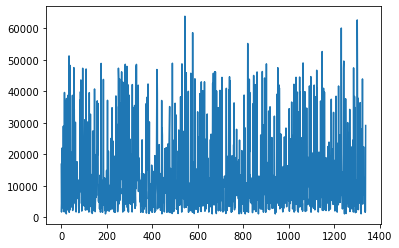

In [64]:
# a quick look at the charges column
insurance['charges'].plot()

<AxesSubplot:xlabel='bmi', ylabel='charges'>

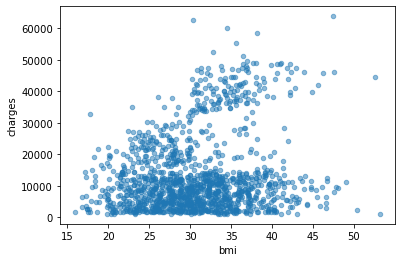

In [67]:
# to visualize a correlation between insurance charges and person's BMI (Body Mass Index)
insurance.plot.scatter(x = 'bmi', y = 'charges', alpha = 0.5)

<AxesSubplot:>

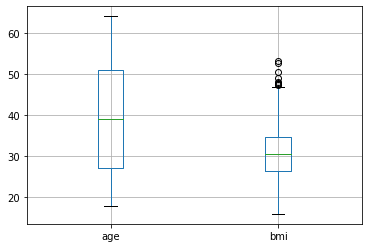

In [78]:
insurance.boxplot(column=['age', 'bmi'])

'smoker' column consist of 0s and 1s. Let us remove it from our data for visualization purposes.

In [80]:
insurance_subset = insurance[['age', 'bmi', 'children', 'charges']]
insurance_subset.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

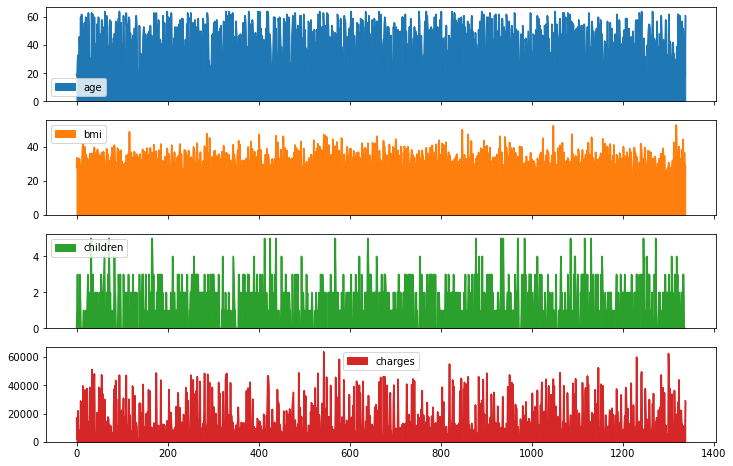

In [84]:
insurance_subset.plot.area(figsize=(12, 8), subplots=True)

## Create New Columns

Let's assume the charges in the insurance data are per year. To create a column of charges per month:

In [86]:
insurance['charges_per_month'] = round(insurance['charges'] / 12, 2)
insurance.head()

,age,bmi,children,smoker,charges,charges_per_month
0,19,27.900,0,1,16884.92400,1407.08
1,18,33.770,1,0,1725.55230,143.80
2,28,33.000,3,0,4449.46200,370.79
3,33,22.705,0,0,21984.47061,1832.04
4,32,28.880,0,0,3866.85520,322.24


In [88]:
insurance['children'].dtype

dtype('int64')

We can change children column into a categorical: `True` for an applicant who has children and `False` for no children.

In [93]:
insurance['children_category'] = insurance['children'] > 0
insurance.head()

,age,bmi,children,smoker,charges,charges_per_month,children_category
0,19,27.900,0,1,16884.92400,1407.08,False
1,18,33.770,1,0,1725.55230,143.80,True
2,28,33.000,3,0,4449.46200,370.79,True
3,33,22.705,0,0,21984.47061,1832.04,False
4,32,28.880,0,0,3866.85520,322.24,False


In [95]:
insurance['children_category'].dtype

dtype('bool')

We can rename the column into upper case / lower case:

In [94]:
insurance_renamed = insurance.rename(columns=str.upper)
insurance_renamed.head()

,AGE,BMI,CHILDREN,SMOKER,CHARGES,CHARGES_PER_MONTH,CHILDREN_CATEGORY
0,19,27.900,0,1,16884.92400,1407.08,False
1,18,33.770,1,0,1725.55230,143.80,True
2,28,33.000,3,0,4449.46200,370.79,True
3,33,22.705,0,0,21984.47061,1832.04,False
4,32,28.880,0,0,3866.85520,322.24,False


## Calculate Summary Statistics

In [98]:
insurance['charges'].mean()

13270.422265141257

In [99]:
insurance[['age', 'charges_per_month']].median()

age                   39.000
charges_per_month    781.835
dtype: float64

If we do not need all the statistics displayed by `insurance.describe()`, we can pick and choose the ones we need by `insurance.agg()` method:

In [100]:
insurance.agg(
    {'age': ['min', 'max', 'median'],
     'charges': ['min', 'max', 'median']
    
}
)

,age,charges
min,18.0,1121.87390
max,64.0,63770.42801
median,39.0,9382.03300


`groupby()` is a powerful method to display aggregated values grouped by a feature.

In [103]:
insurance[['age', 'charges', 'children_category']].groupby('children_category').mean()

,age,charges
children_category,,
False,38.444251,12365.975602
True,39.780105,13949.941093


Please note the difference in the output of the following two codes. Although the codes produce similar results, data type for `a` is a `float`, and data type for `b` is a `DataFrame`. 

In [113]:
a = insurance.groupby('children_category')['age'].mean()
a

children_category
False    38.444251
True     39.780105
Name: age, dtype: float64

In [114]:
a.dtype

dtype('float64')

In [115]:
b = insurance[['children_category', 'age']].groupby('children_category').mean()
b

,age
children_category,
False,38.444251
True,39.780105


In [116]:
type(b)

pandas.core.frame.DataFrame

We can group by more than one categories:

In [119]:
insurance.groupby(['smoker', 'children_category'])['charges'].max()

smoker  children_category
0       False                30259.99556
        True                 36910.60803
1       False                63770.42801
        True                 60021.39897
Name: charges, dtype: float64

We can count data points in each category with `value_counts()` method:

In [120]:
insurance['children_category'].value_counts()

True     764
False    574
Name: children_category, dtype: int64

## Reshaping Data

In [121]:
insurance.sort_values(by = 'charges').head()

,age,bmi,children,smoker,charges,charges_per_month,children_category
940,18,23.21,0,0,1121.8739,93.49,False
808,18,30.14,0,0,1131.5066,94.29,False
1244,18,33.33,0,0,1135.9407,94.66,False
663,18,33.66,0,0,1136.3994,94.70,False
22,18,34.10,0,0,1137.0110,94.75,False


In [124]:
insurance.sort_values(by = ['bmi', 'charges'], ascending = False).head()
# note that the code will sort by the column1 (bmi in this case) first and then by column2 ('charges')

,age,bmi,children,smoker,charges,charges_per_month,children_category
1317,18,53.13,0,0,1163.4627,96.96,False
1047,22,52.58,1,1,44501.3982,3708.45,True
847,23,50.38,1,0,2438.0552,203.17,True
116,58,49.06,0,0,11381.3254,948.44,False
286,46,48.07,2,0,9432.9253,786.08,True


To reshape a dataset from a 'long' to a 'wide' format means a dataset will be transformed to have __more columns__. `pivot()` method performs this transformation.

In [152]:
rental = pd.read_csv('https://raw.githubusercontent.com/asel-ik/SupportingFiles/main/rental_listings.csv')

In [153]:
rental_subset = rental[['price', 'neighbourhood']]
rental_subset.shape

(22552, 2)

In [154]:
rental_neighb = rental_subset.pivot(columns = 'neighbourhood', values = 'price')
rental_neighb.head()

neighbourhood,Charlottenburg-Wilm.,Friedrichshain-Kreuzberg,Lichtenberg,Marzahn - Hellersdorf,Mitte,Neukolln,Pankow,Reinickendorf,Spandau,Steglitz - Zehlendorf,Tempelhof - Schoneberg,Treptow - Kopenick
0,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN


In [145]:
rental_neighb.shape

(22552, 12)

This pivoted dataset contains rental prices in each location.

To reshape from wide to long format, `melt()` method is used.

In [162]:
insurance.melt(id_vars = 'smoker').

,smoker,variable,value
0,1,age,19
1,0,age,18
2,0,age,28
3,0,age,33
4,0,age,32
...,...,...,...
8023,0,children_category,True
8024,0,children_category,False
8025,0,children_category,False
8026,0,children_category,False


## Combining Data

Let us split rental data to illustrate ways to combine them.

In [164]:
rental1 = rental[:10000] # first 9999 rows
rental2 = rental[10000:] # from row 10000 until last row

In [165]:
rental1.shape

(10000, 11)

In [166]:
rental2.shape

(12552, 11)

`concat()` function combines datasets row-wise.

In [182]:
rental_row_wise = pd.concat([rental1, rental2], axis = 0)
rental_row_wise.shape

(22552, 11)

Let us split rental data again to combine it column-wise.

In [177]:
rental3 = rental[['id', 'price', 'number_of_rooms']]
rental4 = rental[['id','size', 'neighbourhood', 'room_type']]

In [178]:
rental3.shape

(22552, 3)

In [179]:
rental4.shape

(22552, 4)

`merge()` function combines datasets column-wise using a common identifier which is 'id' in this case.

In [183]:
rental_column_wise = pd.merge(rental3, rental4, how = 'left', on = 'id')
rental_column_wise.shape

(22552, 6)

## Time Series Data Handling

In [185]:
# load data with time series column
air_quality = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2_long.csv')
air_quality.head(3)

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³


`to_datetime()` function in action:

In [186]:
air_quality['date.utc'] = pd.to_datetime(air_quality['date.utc'])

In [187]:
air_quality['date.utc'].dtype

datetime64[ns, UTC]

Length of our time series:

In [189]:
air_quality['date.utc'].max() - air_quality['date.utc'].min()

Timedelta('44 days 23:00:00')

Add 'month' column extracted from 'date.utc':

In [190]:
air_quality['month'] = air_quality['date.utc'].dt.month
air_quality.head(3)

,city,country,date.utc,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6


Setting datetime as index is a powerful tool to subset data further. We can also plot data based on datetime object.

In [196]:
air_date = air_quality.pivot(index="date.utc", columns="location", values="value")
air_date.head(3)

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0


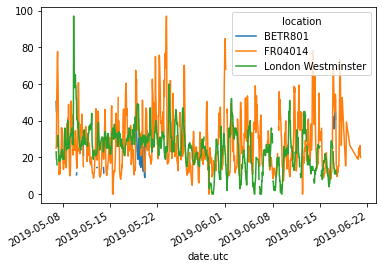

In [197]:
# plotting entire data
air_date.plot();

<AxesSubplot:xlabel='date.utc'>

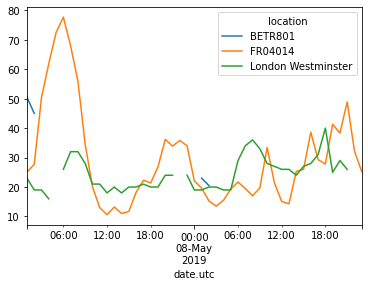

In [198]:
# subsetting the data
air_date['2019-05-07':'2019-05-08'].plot()

## Textual data

In [199]:
# lower case
rental['room_type'].str.lower()

0        entire home_apt
1           private room
2        entire home_apt
3           private room
4           private room
              ...       
22547    entire home_apt
22548        shared room
22549    entire home_apt
22550       private room
22551       private room
Name: room_type, Length: 22552, dtype: object

In [202]:
# lower case and split the string
rental['room_type'].str.lower().str.split()

0        [entire, home_apt]
1           [private, room]
2        [entire, home_apt]
3           [private, room]
4           [private, room]
                ...        
22547    [entire, home_apt]
22548        [shared, room]
22549    [entire, home_apt]
22550       [private, room]
22551       [private, room]
Name: room_type, Length: 22552, dtype: object

In [204]:
# lower case, split the string, and set the first position (index 0) of the string as a new column value
rental['room_type_one_word'] = rental['room_type'].str.lower().str.split().str.get(0)
rental.head()

,id,price,size,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,availability_days_in_year,number_of_rooms,neighbourhood,room_type,room_type_one_word
0,2015,60,474,4,118,3.76,4,141,9,Mitte,Entire home_apt,entire
1,2695,17,155,2,6,1.42,1,0,3,Pankow,Private room,private
2,3176,90,770,62,143,1.25,1,220,3,Pankow,Entire home_apt,entire
3,3309,26,297,5,25,0.39,1,297,9,Tempelhof - Schoneberg,Private room,private
4,7071,42,396,2,197,1.75,1,26,2,Pankow,Private room,private


In [205]:
# how long strings are
rental['neighbourhood'].str.len()

0         5
1         6
2         6
3        22
4         6
         ..
22547     5
22548    22
22549     6
22550     5
22551     8
Name: neighbourhood, Length: 22552, dtype: int64

In [206]:
# shorten room_type values further
rental['room_type_one_letter'] = rental['room_type_one_word'].replace({'entire' : 'e',
                                                                      'shared' : 's',
                                                                      'private' : 'p'})
rental['room_type_one_letter']

0        e
1        p
2        e
3        p
4        p
        ..
22547    e
22548    s
22549    e
22550    p
22551    p
Name: room_type_one_letter, Length: 22552, dtype: object

## PRACTICE IN YOUR NOTEBOOK

- Manipulate 'neighbourhood' column to shorten the strings.

- Count values of 'room_type' column.

- Group rental data by 'neighbourhood' and find which location has the highest rent.


# References

- Pandas. Getting Started tutorials. https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html